

# 1. Evaluating Logistic Regression with Cross-Validation




In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select relevant columns
df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df.dropna(inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']


## Logistic Regression with Train–Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

acc_split = accuracy_score(y_test, y_pred)
print("Train–Test Split Accuracy:", acc_split)


Train–Test Split Accuracy: 0.7972027972027972


## Logistic Regression with K-Fold Cross-Validation

In [13]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(log_reg, X, y, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.81944444 0.80555556 0.74647887 0.74647887 0.74647887 0.85915493
 0.88732394 0.83098592 0.71830986 0.83098592]
Average CV Accuracy: 0.7991197183098592


## Insights

If split accuracy is higher than CV average, the model might be overfitting to that particular split.

# 2. Analyzing Overfitting and Underfitting in Decision Trees

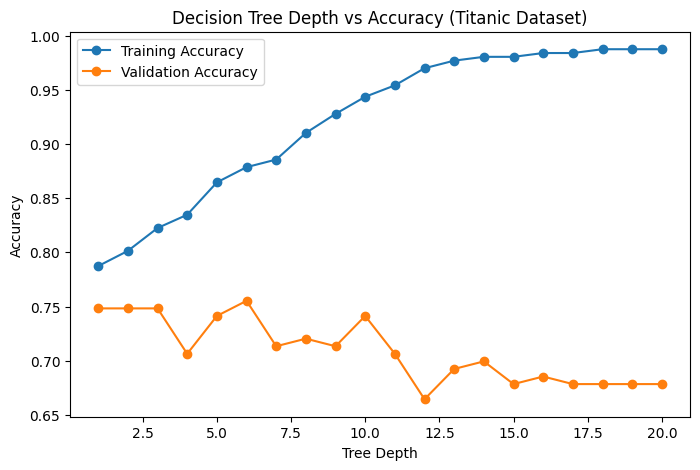

In [15]:
# 🚢 Titanic - Decision Tree Depth Analysis (Single Code)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df.dropna(inplace=True)
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train decision trees with different depths
train_accuracies, val_accuracies = [], []
depths = range(1, 21)

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, tree.predict(X_train)))
    val_accuracies.append(accuracy_score(y_val, tree.predict(X_val)))

# 3. Plot training vs validation accuracy
plt.figure(figsize=(8,5))
plt.plot(depths, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(depths, val_accuracies, label="Validation Accuracy", marker='o')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth vs Accuracy (Titanic Dataset)")
plt.legend()
plt.show()



## Insights


Shallow trees underfit (low accuracy), deep trees overfit (train high, val low), and optimal depth balances both with high, close accuracies.

# 3. Calculating Precision, Recall, and F1-Score for Logistic Regression


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Example preprocessing (assuming df is cleaned)
X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.7972027972027972
Precision: 0.8541666666666666
Recall: 0.6507936507936508
F1-Score: 0.7387387387387387


## Insights

These metrics (precision, recall, and F1-score) provide a deeper view of model performance by highlighting how well it identifies survivors versus non-survivors, which accuracy alone cannot show in imbalanced data.

# 4. ROC Curve and AUC Analysis for Decision Trees


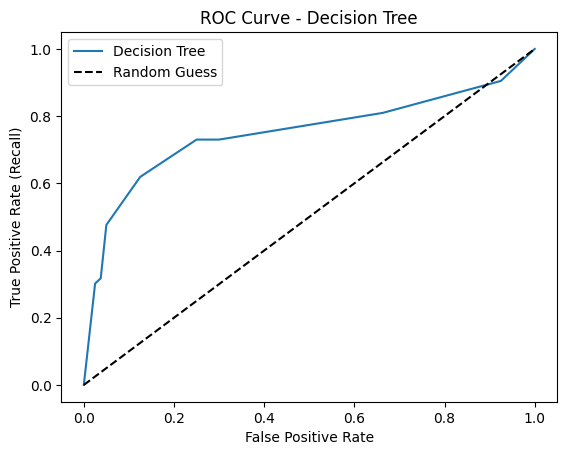

AUC: 0.75


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predicted probabilities for positive class (Survived = 1)
y_probs = dt_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label="Decision Tree")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

# AUC
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)


## Insights


ROC curve and AUC give a clearer measure of how well the model separates survivors from non-survivors beyond accuracy.

# 5. Comparing Model Performance with and without Cross-Validation


In [20]:
from sklearn.model_selection import cross_val_score
import numpy as np

def cv_evaluate(model, X, y, model_name):
    acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    prec = cross_val_score(model, X, y, cv=5, scoring='precision')
    rec = cross_val_score(model, X, y, cv=5, scoring='recall')

    print(f"{model_name} (CV) - Accuracy: {np.mean(acc):.3f}, "
          f"Precision: {np.mean(prec):.3f}, "
          f"Recall: {np.mean(rec):.3f}")

cv_evaluate(LogisticRegression(max_iter=1000), X, y, "Logistic Regression")
cv_evaluate(DecisionTreeClassifier(max_depth=5, random_state=42), X, y, "Decision Tree")


Logistic Regression (CV) - Accuracy: 0.788, Precision: 0.762, Recall: 0.698
Decision Tree (CV) - Accuracy: 0.801, Precision: 0.814, Recall: 0.666


In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

def cv_evaluate(model, X, y, model_name):
    acc = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    prec = cross_val_score(model, X, y, cv=5, scoring='precision')
    rec = cross_val_score(model, X, y, cv=5, scoring='recall')

    print(f"{model_name} (CV) - Accuracy: {np.mean(acc):.3f}, "
          f"Precision: {np.mean(prec):.3f}, "
          f"Recall: {np.mean(rec):.3f}")

cv_evaluate(LogisticRegression(max_iter=1000), X, y, "Logistic Regression")
cv_evaluate(DecisionTreeClassifier(max_depth=5, random_state=42), X, y, "Decision Tree")


Logistic Regression (CV) - Accuracy: 0.788, Precision: 0.762, Recall: 0.698
Decision Tree (CV) - Accuracy: 0.801, Precision: 0.814, Recall: 0.666


## Insights


Cross-validation reduces variance in evaluation by testing the model on multiple folds, giving a more reliable and generalizable estimate of real-world performance than a single train-test split.

# 6. Applying Cross-Validation to Random Forest Classifier


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Cross-validation (5-fold)
acc_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
prec_scores = cross_val_score(rf_model, X, y, cv=5, scoring='precision')
rec_scores = cross_val_score(rf_model, X, y, cv=5, scoring='recall')

print("Random Forest (CV Accuracy):", acc_scores)
print("Mean Accuracy:", np.mean(acc_scores))
print("Mean Precision:", np.mean(prec_scores))
print("Mean Recall:", np.mean(rec_scores))


Random Forest (CV Accuracy): [0.72727273 0.82517483 0.80985915 0.78873239 0.86619718]
Mean Accuracy: 0.8034472569683837
Mean Precision: 0.8346791546634668
Mean Recall: 0.6491228070175439


Ensemble methods like Random Forest achieve higher mean accuracy with more stable cross-validation scores, reducing variance and improving robustness compared to single models.


# 7. Investigating Overfitting and Underfitting in Gradient Boosting Machines


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Different parameter settings
settings = [
    {"n_estimators": 50, "learning_rate": 0.1},
    {"n_estimators": 200, "learning_rate": 0.1},
    {"n_estimators": 200, "learning_rate": 0.05},
    {"n_estimators": 500, "learning_rate": 0.01}
]

for params in settings:
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    print(f"n_estimators={params['n_estimators']}, learning_rate={params['learning_rate']}")
    print(f"  Train Accuracy: {train_acc:.3f}, Validation Accuracy: {val_acc:.3f}\n")


n_estimators=50, learning_rate=0.1
  Train Accuracy: 0.900, Validation Accuracy: 0.755

n_estimators=200, learning_rate=0.1
  Train Accuracy: 0.947, Validation Accuracy: 0.783

n_estimators=200, learning_rate=0.05
  Train Accuracy: 0.923, Validation Accuracy: 0.769

n_estimators=500, learning_rate=0.01
  Train Accuracy: 0.891, Validation Accuracy: 0.769



Boosting parameters like learning rate and number of estimators control the balance between underfitting and overfitting, shaping how well the model generalizes to unseen data.

# 8. Evaluating Precision, Recall, and F1-Score for Random Forests

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")



Random Forest Performance:
Accuracy: 0.797
Precision: 0.870
Recall: 0.635
F1-Score: 0.734


Boosting models should be evaluated with threshold-independent metrics like ROC-AUC to capture their true ability to separate classes beyond fixed precision or recall values.

# 9. ROC Curve and AUC for Gradient Boosting Classifier


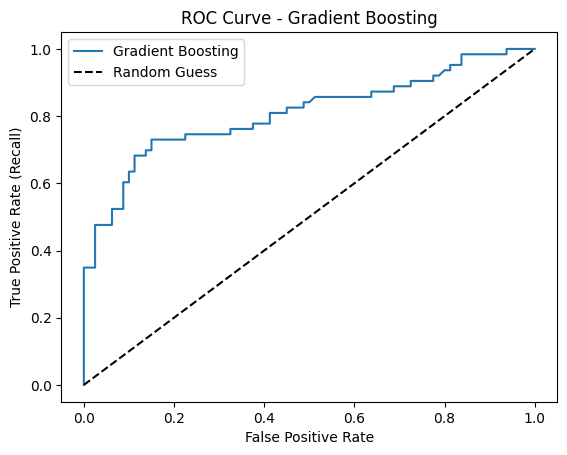

AUC: 0.8089285714285714


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train model
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predicted probabilities for positive class (Survived = 1)
y_probs = gb_model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label="Gradient Boosting")
plt.plot([0,1], [0,1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()

# AUC Score
auc = roc_auc_score(y_test, y_probs)
print("AUC:", auc)


Gradient Boosting achieved an AUC of 0.809, showing it separates survivors from non-survivors well, and highlighting the value of threshold-independent metrics for reliable evaluation.

# 10. Model Performance Comparison with Different Metrics


In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Models
models = {
    "SVM": SVC(probability=True, kernel="rbf", random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
}

# Evaluation function
def evaluate_model(name, model, X, y):
    metrics = {}
    metrics["Accuracy"] = cross_val_score(model, X, y, cv=5, scoring="accuracy").mean()
    metrics["Precision"] = cross_val_score(model, X, y, cv=5, scoring="precision").mean()
    metrics["Recall"] = cross_val_score(model, X, y, cv=5, scoring="recall").mean()
    metrics["F1"] = cross_val_score(model, X, y, cv=5, scoring="f1").mean()
    metrics["ROC-AUC"] = cross_val_score(model, X, y, cv=5, scoring="roc_auc").mean()
    return metrics

results = {}
for name, model in models.items():
    results[name] = evaluate_model(name, model, X, y)

# Show results
import pandas as pd
df_results = pd.DataFrame(results).T
print(df_results)


                   Accuracy  Precision    Recall        F1   ROC-AUC
SVM                0.670019   0.698407  0.329885  0.445902  0.722646
Random Forest      0.803447   0.834679  0.649123  0.724308  0.862386
Gradient Boosting  0.821688   0.819627  0.722142  0.764324  0.867767


By comparing accuracy, precision, recall, F1, and ROC-AUC, Gradient Boosting emerges as the best-performing model overall, offering the most balanced performance across metrics.